Parameters of the best solution : [1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
Fitness value of the best solution = 0
Fitness value of - 12.3*pow(decimal, 3) =  -10771968555.633902
Index of the best solution : 0
Best fitness value reached after 0 generations.


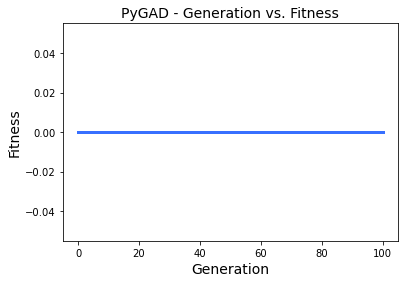

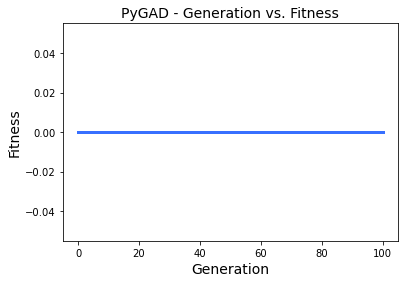

In [28]:
import pandas
import random
import numpy
import pygad
#creamos un array de 10x10 que funcionará como mapa

#x  xxxxxxP
#x  xxMxxxx
#x  xxxxxxx
#xxxxxxxxxx
#xMxxxxxxxx
#xxxxxxxxxP
#xxxxx     
#xxMxx
#xxxxx
#xxxxx

room = [['x',' ',' ','x','x','x','x','x','x','P'],['x',' ',' ','x','x','M','x','x','x','x'],
       ['x',' ',' ','x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x','x','x','x'], 
       ['x','M','x','x','x','x','x','x','x','x'], ['x','x','x','x','x','x','x','x','x','P'], 
       ['x','x','x','x','x',' ',' ',' ',' ',' '], ['x','x','M','x','x',' ',' ',' ',' ',' '],
       ['x','x','x','x','x',' ',' ',' ',' ',' '], ['x','x','x','x','x',' ',' ',' ',' ',' ']]

#print(pandas.DataFrame(room))

#validamos espacios y generamos un cromosoma aleatorio para las personas

pc = 0.2

def spacevali(room):
    sol=[]
    
    alto=len(rom)
    ancho=len(rom[0])
    print(alto)
    print(ancho)
    for i in range(ancho):
        sol.append([])
        for j in range(alto):
            ale=random.random()
            casilla = room[i][j]
            disponible = casilla == 'x'
            persona = ale < pc and disponible
            sol[i].append(1 if disponible else 0)  
    return sol
#array_1d = array_2d.flatten()

def peoplegen(room,n):
    people=[]
    for i in range(n):
        test = spacevali(room)
        prinr(test)
        test = test.flatten()
        print(test)
        people.append(test)
    return people

#creamos una funcion para revisar las personas adyacentes

def alrededores(sol, i, j):
    alto = len(sol)
    ancho = len(sol[0])
    
    for ii in range(i-1,i+2):
        for jj in range(j-1,j+2):
            if ii == i and jj==j:
                continue
            if ii < 0 or ii>= alto or jj <0 or jj>=largo:
                continue
            elif sol[ii][jj] ==1:
                return false
        return true

#generamos el fitness

def fitnessFunction(sol, i):
    global room

    alto = len(room)
    ancho = len(room[0])
    #print(sol)
    #print(len(sol))
    if len(sol) == 20:
        sol = numpy.reshape(sol, (2,-1))
        #print(sol)
        
    fitness=0
    
    
    for i in range(10):
        for j in range(10):
            solspace = sol[i][j]
            roomspace = room[i][j]
            
            if solspace == 1:
                if roomspace == ' ' or roomspace == 'P' or roomspace == 'M':
                    fitness = 0
                continue
                valid=alrededores(sol,i,j)
                if valid:
                    fitness +=10
                    continue
                else:
                    fitness =0
                    continue
        return fitness            
    
fitness_function = fitnessFunction


    
num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 20 # Number of solutions in the population.
num_genes = 20
parent_selection_type = "tournament"  # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
crossover_type = "single_point" # Type of the crossover operator.
# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.


                       
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_function,
                       parent_selection_type=parent_selection_type,
                       gene_space=[0, 1],
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)
                       #callback_generation=callback_generation)

last_fitness = 0

def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed),
    ",   Fitness Best   = {fitness:.3f}".format(fitness=ga_instance.best_solution()[1]),
    ",   Change     = {change:.3f}".format(change=ga_instance.best_solution()[1] - last_fitness))
    
    print(pandas.DataFrame(room))
    
    last_fitness = ga_instance.best_solution()[1]
    
    if ga_instace.generations_completed % 10 ==0:
        ga_instance.plot_fitness()
    

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
decimal = int(''.join(map(lambda solution: str(int(solution)), solution)), 2)  / 1000
print("Fitness value of - 12.3*pow(decimal, 3) = ",  - 12.3*pow(decimal, 3))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))


if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()

#x  xxxxxxP
#x  xxMxxxx
#x  xxxxxxx
#xxxxxxxxxx
#xMxxxxxxxx
#xxxxxxxxxP
#xxxxx     
#xxMxx
#xxxxx
#xxxxx

C:\Users\pipe-\anaconda3\lib\site-packages\pygad\pygad.py:731: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


Generation = 1 ,   Fitness Best   = 0.000 ,   Change     = 0.000
Generation = 2 ,   Fitness Best   = 0.000 ,   Change     = -0.000
Generation = 3 ,   Fitness Best   = 0.000 ,   Change     = 0.000
Generation = 4 ,   Fitness Best   = 0.000 ,   Change     = 0.000
Generation = 5 ,   Fitness Best   = 0.031 ,   Change     = 0.031
Generation = 6 ,   Fitness Best   = 0.005 ,   Change     = -0.025
Generation = 7 ,   Fitness Best   = 0.005 ,   Change     = 0.000
Generation = 8 ,   Fitness Best   = 0.005 ,   Change     = 0.000
Generation = 9 ,   Fitness Best   = 0.019 ,   Change     = 0.014
Generation = 10 ,   Fitness Best   = 0.005 ,   Change     = -0.014
Generation = 11 ,   Fitness Best   = 0.035 ,   Change     = 0.030
Generation = 12 ,   Fitness Best   = 0.030 ,   Change     = -0.006
Generation = 13 ,   Fitness Best   = 0.035 ,   Change     = 0.006
Generation = 14 ,   Fitness Best   = 0.159 ,   Change     = 0.124
Generation = 15 ,   Fitness Best   = 0.159 ,   Change     = 0.000
Generation = 16

C:\Users\pipe-\anaconda3\lib\site-packages\pygad\pygad.py:3135: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


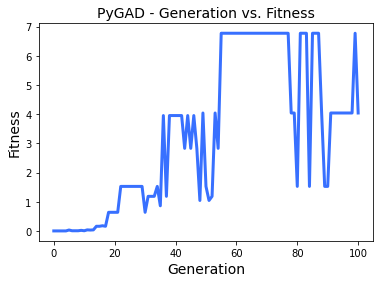

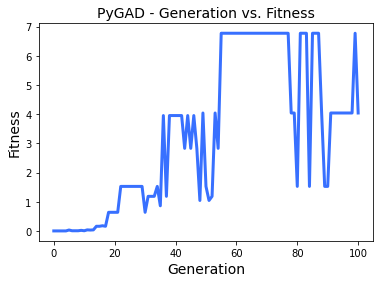

In [23]:
#UNA EXPLICACION DE LA PARAMETRIZACION EN:
#https://blog.paperspace.com/working-with-different-genetic-algorithm-representations-python/

import pygad
import numpy

#CALCULA EL VALOR DE X EN LA ECUASION,    0 = 55 - 12.3*pow(X, 3), USANDO AG BINARIO

num_generations = 100 # Number of generations.
num_parents_mating = 7 # Number of solutions to be selected as parents in the mating pool.
sol_per_pop = 20 # Number of solutions in the population.
num_genes = 20
parent_selection_type = "tournament"  # Type of parent selection.
keep_parents = 7 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.
crossover_type = "single_point" # Type of the crossover operator.
# Parameters of the mutation operation.
mutation_type = "random" # Type of the mutation operator.
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.


def fitness_func(solution, parametro2):
    #Convierte el cromosoma de 1s y 0s en un decimal
    decimal = int(''.join(map(lambda solution: str(int(solution)), solution)), 2)  / 1000
    fitness = 1.0/abs(55 - 12.3*pow(decimal, 3))
    #print(decimal, - 12.3*pow(decimal, 3),  fitness)
    return fitness

fitness_function = fitness_func


last_fitness = 0
def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed),
    ",   Fitness Best   = {fitness:.3f}".format(fitness=ga_instance.best_solution()[1]),
    ",   Change     = {change:.3f}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]


ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_function,
                       parent_selection_type=parent_selection_type,
                       gene_space=[0, 1],
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       callback_generation=callback_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
decimal = int(''.join(map(lambda solution: str(int(solution)), solution)), 2)  / 1000
print("Fitness value of - 12.3*pow(decimal, 3) = ",  - 12.3*pow(decimal, 3))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))


if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_result()